<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 2 - Algorismes sobre grafs</h2>
</center>
</div>

In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [20]:
import matplotlib.pylab as plt
import numpy as np
import random

## Recordatori: DFS

In [21]:
def dfs(G, visited, current_node):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:        
        print(current_node, end=' ')
        visited.add(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        for nei in G.neighbors(current_node):
            dfs(G, visited, nei)        

DFS: 0 1 2 3 4 5 6 7 8 9 

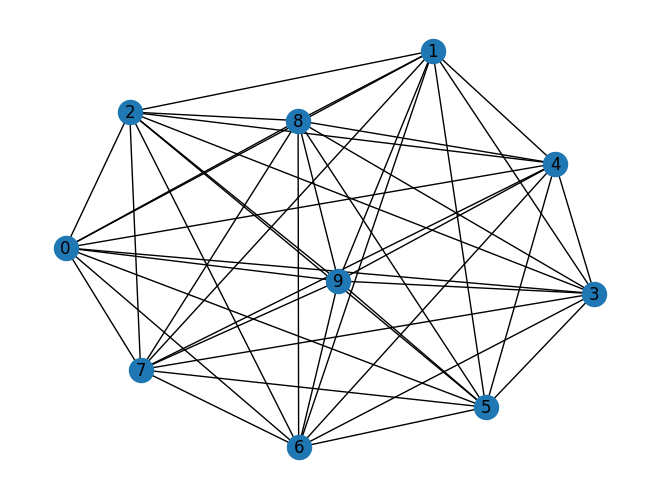

In [22]:
import networkx as nx
G = nx.random_geometric_graph(10, 3)

print('DFS: ',end='')
dfs(G, set(), 0)

nx.draw(G, with_labels=True)

## Component connexa

Sigui $G$ un graf, una __component connexa__ és un subgraf $S\subset G$ tal que, per a dos nodes qualsevols de $S$, existeix un camí dins de $S$ que els connecta i per a qualsevol parella de nodes de $G$ on $n_1\in S$, $n_2\notin S$, no existeix un camí entre $n_1$ i $n_2$.

Observeu l'exemple següent. Aquest graf té tres compoenents connexes:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" alt="image info" style="width:20%"/>

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Donat un graf, escriu un algorisme que retorni el nombre de components connexes que conté i una llista de llistes amb tots els nodes de cada component connexa.
</p>    
    
</div>

In [23]:
def connected_components(G):
    visited = set()
    lista_de_nodos = []
    count = 0

    for node in G.nodes():

        if node not in visited:
            visited_internally = set()
            dfs(G, visited_internally, node)
            count += 1
            visited.update(visited_internally)
            lista_de_nodos.append(list(visited_internally))

    return count, lista_de_nodos

1 2 3 4 5 6 7 8 9 10 11 12 13 14 (3, [[1, 2, 3, 4], [8, 5, 6, 7], [9, 10, 11, 12, 13, 14]])


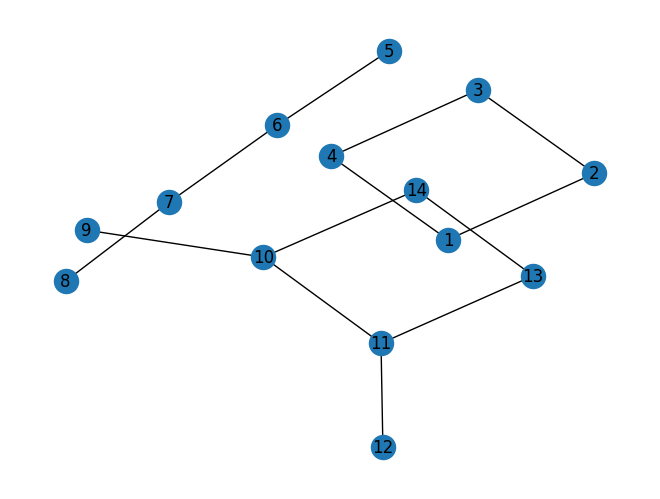

In [24]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,1),(5,6),(6,7),(7,8),(9,10),(10,11),(11,12),(11,13),(13,14),(14,10)])
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True)

print(connected_components(G))

## Grafs bipartits

Diem que un graf és __bipartit__ si podem separar els seus nodes en dos grups de manera que els nodes del primer grup només tinguin arestes cap a nodes del segon grup (i viceversa). És a dir, que no existeixin arestes que connectin nodes d'un mateix grup: 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Simple-bipartite-graph.svg" alt="bipartite graph" style="width: 25%" />

Networkx ens permet generar grafs bipartits aleatoris utilitzant la funció `random_graph()` del mòdul _bipartite_. Aquesta funció rep tres paràmetres $n, m, p$ on:
- $n$ és el nombre de nodes del primer grup.
- $m$ és el nombre de nodes del segon grup.
- $p$ és la probabilitat de creació d'arestes (0 per no crear-ne cap i 1 per crear-les totes).

La visualització següent mostra el mateix graf usant dos _layouts_ diferents. La primera figura mostra el layout per defecte on no és fàcil veure si el graf és bipartit o no. En el segon, podem veure clarament els dos grups i com les arestes no connecten nodes d'un mateix grup.

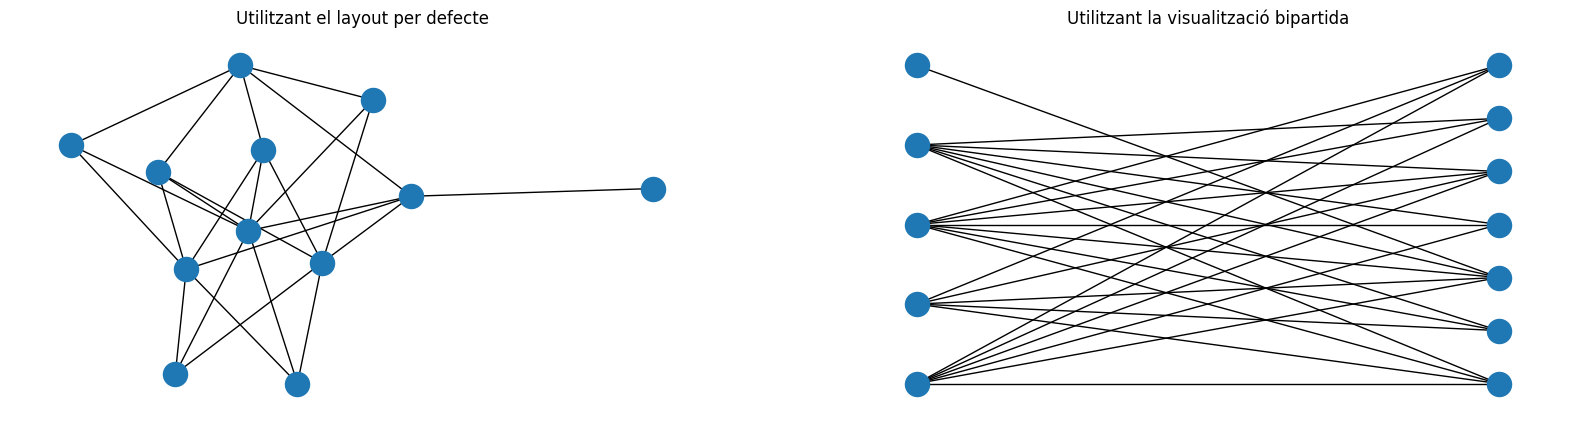

In [25]:
# Generem un graf bipartit connectat (tots els nodes tenen com a mínim una aresta associada)
G = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G = nx.algorithms.bipartite.random_graph(5,7,0.6)

top = nx.bipartite.sets(G)[0]
posbi = nx.bipartite_layout(G, top)

# Mostrem el mateix graf de dues formes diferents
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Utilitzant el layout per defecte')
nx.draw(G, ax=axs[0])

axs[1].set_title('Utilitzant la visualització bipartida')
nx.draw(G, pos=posbi, ax=axs[1])

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Implementeu un algorisme per a determinar si un graf és bipartit. Assumirem que el graf està connectat (entre dos nodes qualsevols sempre existeix un camí) i és NO dirigit.
    <ul>
        <li>Podeu utilitzar el diccionari intern de cada node per a guardar-hi informació: <br>$G.nodes[idx][clau]$ on $idx$ és l'index del node i $clau$ és qualsevol paraula que identifica l'atribut del node.
        <li>Podeu usar la funcio 'neighbors' per a retornar els veïns d'un node
        <li>Per a que sigui més senzill, definiu una funció auxiliar que es basi en el DFS per a fer la cerca.
    </ul>
</p>    
    
<p>

</p>
    
</div>

In [26]:
# Generem un graf bipartit
# En aquest problema, ens assegurem que el graf generat no tingui nodes aïllats
G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)

# Al crear un graf bipartit, es crea un atribut anomenat 'bipartite' que pren valors 0 i 1. Els eliminem ja que no els usarem en la nostra solució
for n in G_bi.nodes():
    del G_bi.nodes[n]['bipartite']

In [27]:
# Generem un graf NO bipartit
G_geo = nx.random_geometric_graph(10, 3)

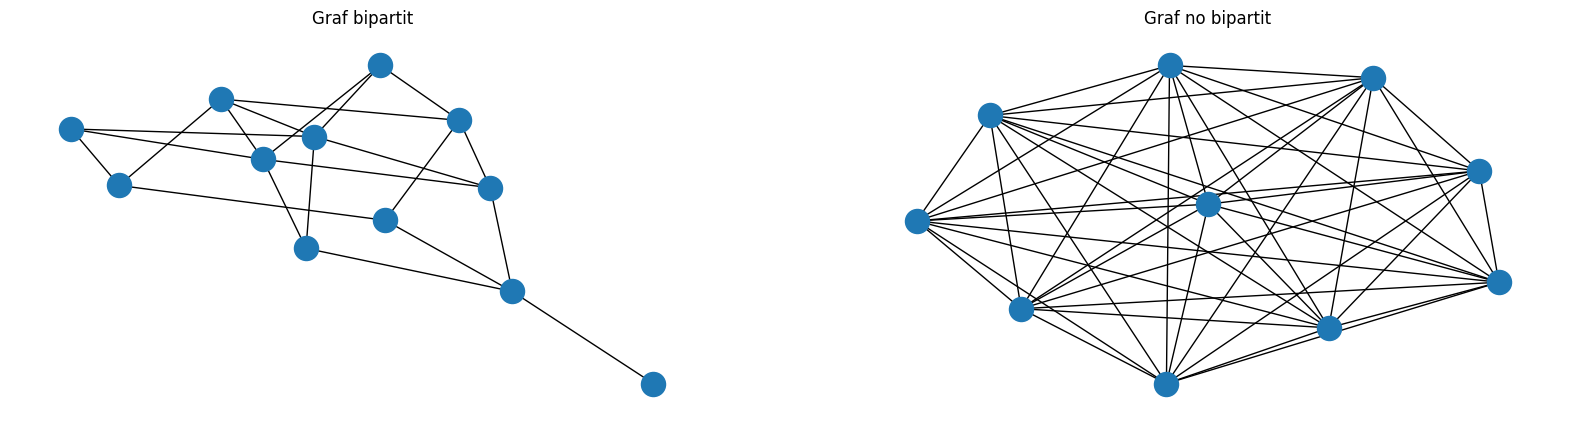

In [28]:
# Mostrem els grafs que hem creat
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Graf bipartit')
nx.draw(G_bi, ax=axs[0])

axs[1].set_title('Graf no bipartit')
nx.draw(G_geo, ax=axs[1])

In [29]:
'''
from random import choice
def es_bipartit(G):
    # EL TEU CODI AQUÍ

    att = 1
    visited = set()

    queue = []
    print(G.nodes())
    queue.append(choice(G.nodes()))
    
    while queue:
        current = queue.pop(0)
        current['attribute'] = att
        att *= -1
        visited.add(current)
        
        for nei in G.neighbors(current):
            if nei not in visited:
                queue.append(nei)

    connected_components(G)


    return False 
'''

"\nfrom random import choice\ndef es_bipartit(G):\n    # EL TEU CODI AQUÍ\n\n    att = 1\n    visited = set()\n\n    queue = []\n    print(G.nodes())\n    queue.append(choice(G.nodes()))\n\n    while queue:\n        current = queue.pop(0)\n        current['attribute'] = att\n        att *= -1\n        visited.add(current)\n\n        for nei in G.neighbors(current):\n            if nei not in visited:\n                queue.append(nei)\n\n    connected_components(G)\n\n\n    return False \n"

In [30]:
'''print(es_bipartit(G_bi.copy()))
print(es_bipartit(G_geo.copy()))'''

'print(es_bipartit(G_bi.copy()))\nprint(es_bipartit(G_geo.copy()))'

<div class="alert alert-success">
<h1>Problema 3</h1>
<p>
    Donada una matriu binària (que només conté zeros i uns) i una casella inicial que conté un 1, implementeu una funció que retorni quants uns són visitables i quins, suposant que només ens podem moure cap amunt, cap avall o cap als dos costats.
    Només podem visitar les caselles que contenen uns.
</p>    
    
<p>

</p>
    
</div>

In [31]:
def visitable_cells_r(M, casilla, visited):

    if casilla not in visited:
        visited.add(casilla)
        x, y = casilla

        if x-1 >= 0 and M[x-1][y]:
            visitable_cells_r(M, (x-1, y), visited) 
        if x+1 < len(M) and M[x+1][y]:
            visitable_cells_r(M, (x+1, y), visited) 
        if y-1 >= 0 and M[x][y-1]:
            visitable_cells_r(M, (x, y-1), visited) 
        if y+1 < len(M) and M[x][y+1]:
            visitable_cells_r(M, (x, y+1), visited) 


def visitable_cells(M, init):
    x, y = init
    assert M[x][y] == 1
    # EL TEU CODI AQUÍ
    
    visited = set()
    visitable_cells_r(M, init, visited)
        
    return len(list(visited)), list(visited)

In [32]:
M = [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]]
init = (1, 1)

for m in M:
    print(m)

num_visit, visit  = visitable_cells(M, init)
print(f"Des de la cel·la {init} es poden visitar {num_visit} cel·les:")
for v1, v2 in visit:
    M[v1][v2] = 8
    
for m in M:
    print(m)

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
Des de la cel·la (1, 1) es poden visitar 23 cel·les:
[0, 8, 8, 8, 0, 8, 0, 0, 0, 0]
[8, 8, 0, 8, 8, 8, 8, 8, 0, 0]
[0, 8, 8, 8, 8, 8, 8, 8, 8, 0]
[1, 0, 0, 8, 0, 8, 0, 0, 8, 8]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]


# Flood Fill

L'algorisme __Flood Fill__ (algorisme d'emplenat) és usat per múltiples editors d'imatges com ara __Paint__, __Gimp__ o __Photoshop__ en l'eina __Pot de Pintura (Paint bucket)__ o __Bareta màgica (Magic Wand)__. Aquesta eina, ens permet seleccionar un punt de la imatge (node inicial) del qual se n'agafa el color. A continuació, s'expandeix a tots els nodes veïns del mateix color fins a seleccionar la màxima àrea possible.



Considerant una imatge com un graf on els nodes veïns de cada pixel són els que toquen amb ell, podem aplicar l'algorisme DFS per a implementar el Flood Fill.

<div class="alert alert-success">
<h1>Problema 4</h1>
<p>
    Implementeu l'algorimse <b>Flood Fill</b>. Podeu usar altres imatges per a provar el vostre algorisme. Tingueu en compte que les imatges no poden ser gaire grans ja que se superarien el nombre de recursions que Jupyter permet.
</p>    
    
<p>
Els següents passos us poden servir de guia:
    <ol>
    <li> És un algorimse recursiu ja que cada hem d'anar expandint nodes (píxels) mentre que el color sigui el mateix. Comença definint la condició de parada.
    <li> Per a cada píxel, qui són els seus veïns? Tots els píxels tenen el mateix nombre de veïns?
    </ol>
</p>
<br>
<b>EXTRA</b>: Modifiqueu l'algorísme afegint un nou paràmetre de tolerància entre colors. Podeu fer servir la funció següent per a calcular la distància entre dos colors:
</div>

In [33]:
# ================
# EXTRA
import numpy as np
def color_distance(color1, color2):
    # Defineix la distància euclidiana entre dos vectors: 'color1', 'color2'
    return np.linalg.norm(color1-color2)
# ================

In [34]:
import sys
# Aquesta instrucció ens permet augmentar el límit de recursions permeses
sys.setrecursionlimit(int(1e9))

In [35]:
from PIL import Image

# Obrim una imatge
image = Image.open('img/map.png').convert('RGB')
width, height = image.size

# Podeu aplicar un factor de reescalat si la imatge és gran
resize_val = 0.5
image = image.resize((int(width*resize_val),int(height*resize_val)))

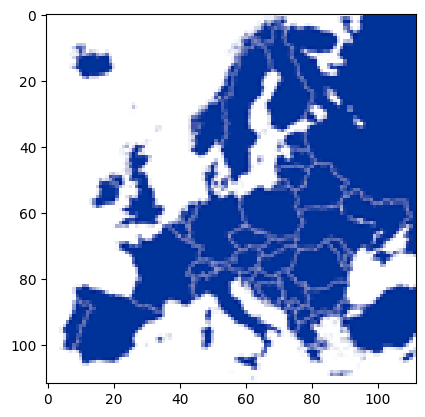

In [36]:
data = np.array(image)
plt.imshow(data)
plt.show()

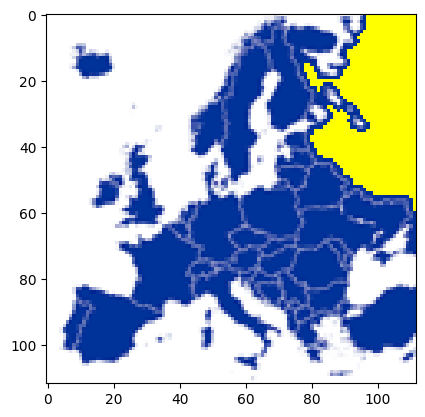

In [ ]:
def r_fill(matrix, casilla, start_color, color_to_update, visited, tolerance):
    
    if casilla not in visited:
        visited.add(casilla)
        x, y = casilla

        if x-1 >= 0 and (matrix[x-1][y] == start_color).all() or :

            matrix[x-1][y] = color_to_update
            r_fill(matrix, (x-1, y), start_color, color_to_update, visited) 

        if x+1 < len(matrix)-1 and (matrix[x+1][y] == start_color).all():

            matrix[x+1][y] = color_to_update
            r_fill(matrix, (x+1, y), start_color, color_to_update, visited) 

        if y-1 >= 0 and (matrix[x][y-1] == start_color).all():

            matrix[x][y-1] = color_to_update
            r_fill(matrix, (x, y-1), start_color, color_to_update, visited) 

        if y+1 < len(matrix)-1 and (matrix[x][y+1] == start_color).all():

            matrix[x][y+1] = color_to_update
            r_fill(matrix, (x, y+1), start_color, color_to_update, visited) 


def flood_fill(matrix, start_x, start_y, new_color):
    # Dimensions de la imatge
    width = len(matrix)
    height = len(matrix[0])
    
    def fill(x,y,start_color,color_to_update, tolerance):
        # EL TEU CODI AQUÍ
        visited = set()
        casilla = (x, y)
        r_fill(matrix, casilla, start_color, color_to_update, visited, tolerance)
        pass

    
    start_color = matrix[start_x][start_y].copy() # Agafem el color de la zona seleccionada
    fill(start_x,start_y,start_color,new_color)   # Fem la primera crida a l'algorisme amb el node inicial


newdata = data.copy()             # Fem una còpia per no modificar la 'data' actual
newcolor = [255,255,0]            # Color (RGB) que usarem per pintar. Són tres valors de 0 a 255. (RGB = Red, Green, Blue)
startpoint = (0, len(newdata)-1)  # Cantonada superior dreta

flood_fill(newdata, startpoint[0], startpoint[1], newcolor)

plt.imshow(newdata)
plt.show()

<div class="alert alert-success">
<h1>Problema 5</h1>
<p>
    Donat un laberint com el que esteu usant a pràctiques, implementeu una funció que comprovi si té solució. La vostra funció ha de retornar True/False indicant si existeix un camí i una llista amb totes els nodes que s'han explorat.
</p>    
    
<p>

</p>
    
</div>

In [38]:


def exist_path(G, source, dest, visited):
    dfs(G, visited, source)
    return dest in visited, visited

0 30 60 90 120 121 91 61 62 63 64 94 124 125 155 185 186 156 126 127 97 96 95 65 66 67 37 7 6 5 35 36 34 4 3 33 32 31 1 2 8 38 39 69 70 40 41 71 72 73 43 42 12 13 14 44 45 75 74 104 105 135 136 166 165 195 194 164 134 133 132 131 161 160 190 220 221 251 281 280 279 249 250 248 218 188 189 219 159 129 130 100 99 98 68 128 158 157 187 217 247 277 276 275 245 244 214 215 216 246 184 183 153 152 122 123 93 92 151 181 180 150 210 240 241 211 212 182 242 243 213 273 272 271 270 274 154 278 101 102 103 282 283 253 254 255 256 286 287 257 227 197 196 226 225 224 223 193 163 162 192 222 252 191 167 137 138 139 169 170 200 199 198 168 228 229 230 231 261 291 292 293 294 295 265 235 234 204 203 233 232 202 201 171 172 142 143 173 174 144 114 113 83 82 52 51 21 22 23 53 54 84 85 55 56 86 116 117 118 148 147 146 176 177 178 208 209 239 238 237 267 266 236 206 207 205 175 145 115 296 297 298 299 269 268 179 149 119 89 59 58 88 87 57 27 26 25 24 28 29 20 19 49 48 18 17 16 15 46 76 77 107 108 78 79 80

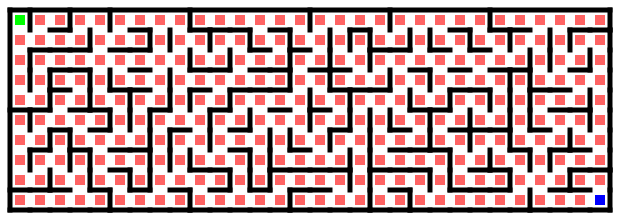

0 1 2 3 4 5 6 7 8 38 37 36 66 67 97 98 128 129 159 158 157 187 188 189 219 249 279 280 281 251 252 278 248 218 217 216 186 156 126 127 155 185 215 245 244 274 273 272 271 270 240 210 180 150 151 152 182 120 181 211 241 242 212 213 183 153 123 122 121 91 90 60 30 31 61 62 63 64 65 95 96 94 124 125 154 184 214 93 92 32 243 275 276 246 247 277 160 161 191 190 220 221 222 192 162 132 131 101 102 72 73 43 13 14 44 74 104 105 106 76 77 47 17 18 107 137 138 139 169 168 108 78 48 79 109 110 80 111 49 19 167 166 136 135 165 195 225 226 255 285 284 254 253 283 282 223 224 194 193 163 133 134 164 103 256 45 46 75 15 16 42 41 71 70 69 99 100 130 68 40 39 9 10 11 12 250 Existeix camí: False


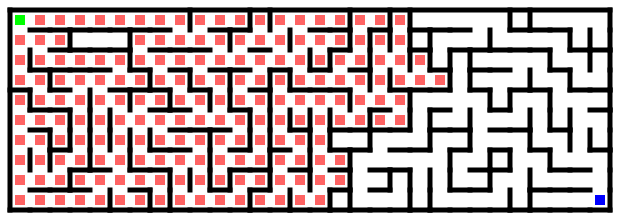

In [39]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *
from IPython.display import display_html

maze1 = Maze(30, 10, seed=17)
maze2 = Maze(30, 10, seed=15, p_build=0.25)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
for maze in [maze1, maze2]:
    G = maze.maze_graph()

    A = 0
    B = len(G.nodes)-1
    existeix, nodes_explorats = exist_path(G, A, B, set())
    
    print(f"Existeix camí: {existeix}")
    
    # Visualitzem
    maze.set_values(nodes_explorats, 1, color=(255,100,100))
    maze.set_value(A, 1, color=(0,255,0))
    maze.set_value(B, 1, color=(0,0,255))
    
    maze.display_maze(plot_path=True, height=200)